# csv 파일 로드.

In [730]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#option float show all 
pd.options.display.float_format = '{:.2f}'.format


df = pd.read_csv('vgames2.csv', index_col = 0)
#df.drop('Unnamed: 0', axis=1,inplace=True) 

df


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.00,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.00,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.00,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.00,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.00,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.00,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.00,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.00,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.00,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [731]:
df[ (df['Year'].isnull()) | (df['Year'] < 250) | (df['NA_Sales'].str.count('M')>0) | (df['NA_Sales'].str.count('K')>0)  ][ ['Year','NA_Sales']]

,Year,NA_Sales
11,2001.00,480K
32,NaN,1.93
46,2015.00,60K
75,9.00,0.01
82,97.00,0.1
...,...,...
16426,NaN,0.06
16433,NaN,0.13
16483,98.00,0M
16493,2012.00,470K


## 데이터 정제 (EDA)


year error cnt = 371
pop cnt = 16598
year err rate= 0.02
mk err rate= 0.01


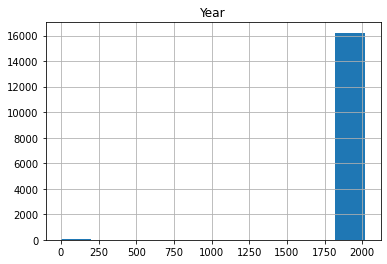

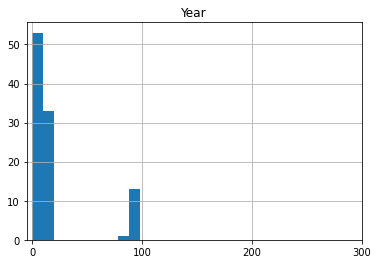

In [732]:
df_year_error= df[ (df['Year'].isnull()) | (df['Year'] < 250)]
df_mk_error = df[ (df['NA_Sales'].str.count('M')>0) | (df['NA_Sales'].str.count('K')>0)]

print( 'year error cnt =',df_year_error.shape[0])
print( 'pop cnt =',df.shape[0])


print('year err rate=', round( df_year_error.shape[0] / df.shape[0] ,2))
print('mk err rate=', round( df_mk_error.shape[0] / df.shape[0] ,2))



# 데이터를 살펴본 결과
# 연도가 Nan or 0인 결측치, 그리고 250 이하의 이상치 데이터가 
# 전체데이터의 0.02%라서 제거하기로 결정했습니다.

# histogram 으로 250이하의 값도 이상치라고 판단.  

df.hist( 'Year')


df_year_error.hist( 'Year') 
Xticks = [x*100 for x in range(4)]
plt.xticks(Xticks)
plt.show()



#중복값도 찾았으나 Year이 0이므로 결측치 제거할때 함께 제거. 
#df[df.duplicated()] 

In [733]:
df1 = df.copy()

# 데이터 제거.
del_con_byYear = df_year_error.index
df1.drop(del_con_byYear, inplace=True)


#장르고,퍼블리셔고 일단 nan 이면 제거. 
df1.dropna(inplace=True)
df1.reset_index(drop=True,inplace = True)


#year int로 변환
df1['Year'] = df1['Year'].astype(int)

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16141 entries, 0 to 16140
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16141 non-null  object
 1   Platform     16141 non-null  object
 2   Year         16141 non-null  int32 
 3   Genre        16141 non-null  object
 4   Publisher    16141 non-null  object
 5   NA_Sales     16141 non-null  object
 6   EU_Sales     16141 non-null  object
 7   JP_Sales     16141 non-null  object
 8   Other_Sales  16141 non-null  object
dtypes: int32(1), object(8)
memory usage: 1.0+ MB


In [734]:
# 숫자만 들어있어야 할 컬럼에 M,K라는 스트링이 존재
# 보통 100만을 M, 1000을 K로 표기해서 사용 함. 
# 숫자로 대체 하는 작업 시행. 

sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'] 

# 방법 1.
# 일단 삭제
def delete_MK():
    
    s1 = set([])
    for v in sales:
        idx = df1[ (df1[v].str.count('M')>0) | (df1[v].str.count('K')>0) ].index
        s1.update(idx)
    #print(s1)
    #print( 'total=', len(s1) / df1.shape[0] )

    df1.drop( s1, inplace=True)
    df1.reset_index(drop=True,inplace = True)




# 방법2.
# M, K데이터 들어있는 데이터 변환.
def convertMK(ss):

    if type(ss) == float:
        pass
    
    elif ss.count('M')>0:
        ss = float(ss.split('M')[0])*1000000
    
    elif ss.count('K')>0:
        ss = float(ss.split('K')[0])*1000
    
    return float(ss)*1000000

def change_MK():
    for c in sales:
        df1[c] = df1[c].apply(convertMK)        
        

#방법1 
delete_MK()
#방법2
#change_MK()

#숫자로 타입변경
df1[sales] = df1[sales].astype(float)
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15382 entries, 0 to 15381
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         15382 non-null  object 
 1   Platform     15382 non-null  object 
 2   Year         15382 non-null  int32  
 3   Genre        15382 non-null  object 
 4   Publisher    15382 non-null  object 
 5   NA_Sales     15382 non-null  float64
 6   EU_Sales     15382 non-null  float64
 7   JP_Sales     15382 non-null  float64
 8   Other_Sales  15382 non-null  float64
dtypes: float64(4), int32(1), object(4)
memory usage: 1021.6+ KB


In [735]:
# 지역별 판매량...
df1[sales].sum()


NA_Sales      4055.22
EU_Sales      2251.70
JP_Sales      1192.14
Other_Sales    743.86
dtype: float64

## 지역별 장르의 판매량

In [736]:
#지역에 따라서 선호하는 게임 장르가 다를까?
#선호하는 게임은 많이 팔린 게임이라고 가정.
#지역별 많이 팔린 장르별 내림차순.

# - [x]  지역으로 그룹화
# - [x]  많이 팔린 게임 순 정렬
# - [x]  어느지역에서 어떤 장르가 많이 팔렸는지 시각화


df1['Total_Sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']

salesAll =[x for x in sales]
salesAll.append('Total_Sales')
salesAll


df_Genre = df1.groupby('Genre')[salesAll].sum()
df_Genre.sort_values(by='Total_Sales',ascending=False,inplace=True)
#df_Genre = df_Genre.reset_index()
df_Genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,801.89,486.60,149.85,176.14,1614.48
Sports,633.87,349.85,126.65,126.13,1236.50
Shooter,544.63,293.38,36.53,96.68,971.22
Role-Playing,283.86,160.10,314.15,50.86,808.97
Platform,410.96,184.11,121.88,47.88,764.83
Misc,380.36,200.14,99.47,69.97,749.94
Racing,334.14,222.66,50.60,73.48,680.88
Fighting,210.51,94.18,82.58,34.33,421.60
Simulation,173.64,106.97,61.51,29.49,371.61


In [737]:
df_Genre.sum()

NA_Sales      4055.22
EU_Sales      2251.70
JP_Sales      1192.14
Other_Sales    743.86
Total_Sales   8242.92
dtype: float64

In [738]:

# df_Genre.sort_values(by='Total_Sales',ascending=False,inplace=True)
# df_Genre[sales].plot.bar( title='Total_Sales',figsize=(12,10))
# plt.show();


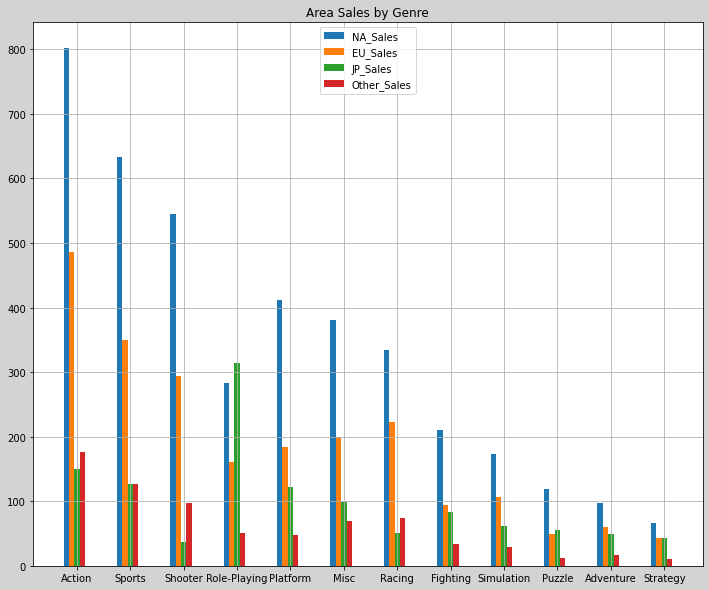

In [739]:

fig, ax = plt.subplots(figsize = (12,10))
ax.grid(True)
fig.set_facecolor('lightgrey')


mylabels = df_Genre.index 

Xticks = np.arange(len(df_Genre.index))
#print(Xticks)

for i,v in enumerate(sales):
    # x 위치를 정해서 같은 x데이터를 옆으로 배치. 
    a = ax.bar( (Xticks+i*0.1)-0.2,  height = v, data = df_Genre,  width = 0.1) 
    
    #x label을 보이게 하고 위치를 자동으로. 대신 bar가 겹쳐짐. 
    #ax.bar( x=mylabels,  height = df_Genre[v], data = df_Genre,  width = .1) 
ax.set_xticks(Xticks, mylabels)
ax.legend(loc='upper center',labels=df_Genre.columns) 

ax.set_title('Area Sales by Genre')

#line 으로 NA_Sales 표기하기.
# for i,v in enumerate(sales):
#     sns.lineplot( x= (Xticks+i*0.1)-0.2, y=v,   data = df_Genre)
#sns.lineplot( x= (Xticks)-0.2, y='NA_Sales',   data = df_Genre)
     
plt.show();



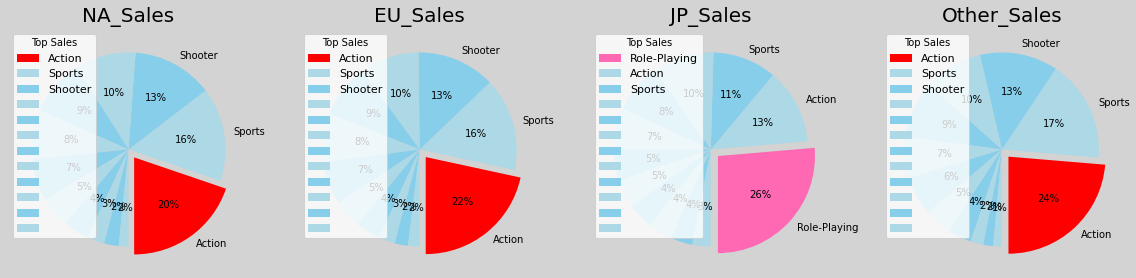

In [764]:

def ShowPie(isAll):
    
    fig, ax = plt.subplots(figsize = (20,12))
    ax.grid(False)
    fig.set_facecolor('lightgrey')

    for i,v in enumerate(sales):
        
        df_sorted = df_Genre.sort_values(by=v,ascending=False)[v]
        
        if isAll == False:
            df_sorted = df_sorted.head(3)

        #Series 의 컬럼은 index
        mylabels = list(df_sorted.index)
        
        #1,2,3위만 라벨 나오게
        for k in range(3,len(mylabels)):
            mylabels[k] = ' '
        
        # series 개수 만큼 넣어줘야함. index 순서. 가운데서 얼만큼 떨어트릴것인가?
        myExplode = [0 for _ in mylabels] 
        myExplode[0] = 0.1
        
        myColor = [ 'skyblue' if i%2==0 else 'lightblue' for i,x in enumerate(myExplode)] 
        myColor[0] = 'red'
        if i== 2:
            myColor[0] = 'hotpink'

        g = plt.subplot(1, 4, i+1)
        g.pie( df_sorted , autopct='%.0f%%',explode = myExplode, startangle = 270, colors=myColor,labels = mylabels )
        #g.pie( df_sorted , autopct='%.0f%%',explode = myExplode, startangle = 270, colors=myColor )
        g.set_title(v, fontsize=20)
        g.legend(title ="Top Sales",loc='upper left',labels = mylabels, fontsize=11) 
        
    plt.show();

ShowPie(True)


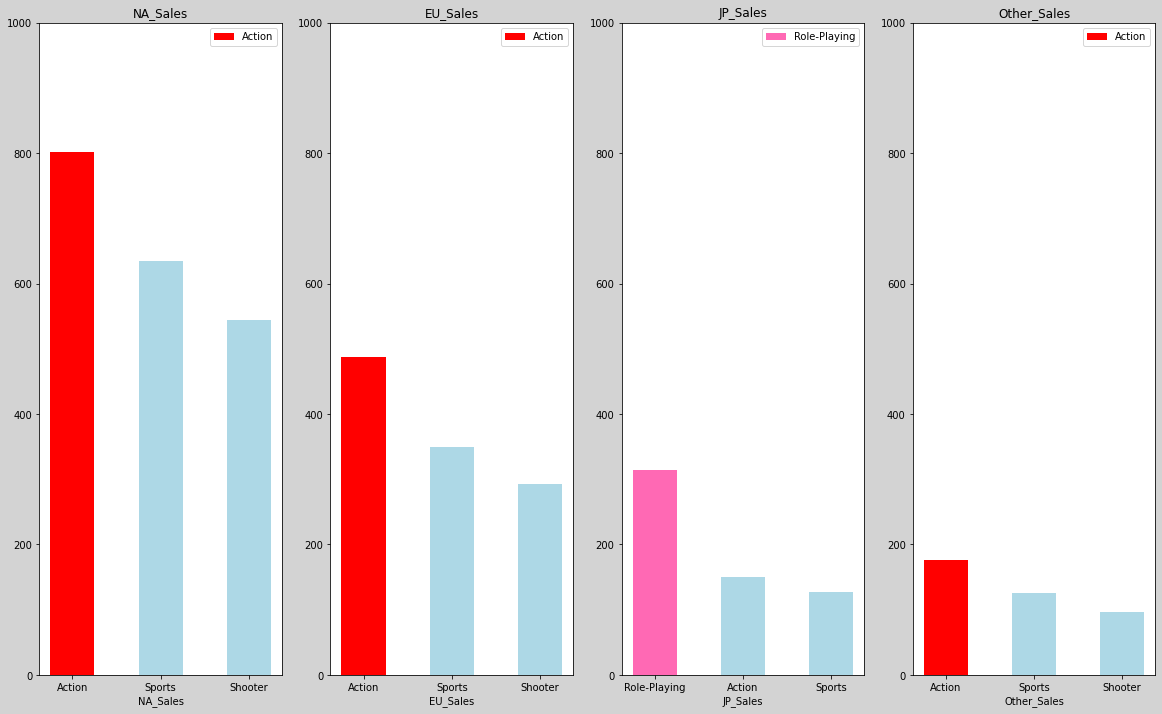

In [741]:
# 위 표는 지역별 각 장르의 판매량 비율을 나타낸 표입니다. 
# JP지역은 '롤플레잉'이 , 그외 NA,EU,Other 지역은 '액션'이 많이 팔린것을 알 수 있습니다.
# 이 결과로 대부분의 지역은 '액션 장르'를 선호했지만 JP지역은 의외로 '롤플레잉 장르'를 선호했음을 유추해볼 수 있습니다.


#지역별 top3
fig, ax = plt.subplots(figsize = (20,12))
fig.set_facecolor('lightgrey')


for i,v in enumerate(sales):
    
    df_sorted = df_Genre.sort_values(by=v,ascending=False)[v].head(3)
    mylabels = df_sorted.index
    colors = ['lightblue' for x in range(len(mylabels))]
    colors[0] = 'r'
    if i==2:
        colors[0] = 'hotpink'
        
    ax = plt.subplot(1, 4, i+1)
    ax.bar( x= df_sorted.index, height=df_sorted.values,color=colors, width = .5)
    
    ax.set_ylim(0,1000) #y gap 
    #ax.set_yticks([50*x for x in range(20)]) #y gap 
    
    ax.set_xlabel(v)
    ax.set_title(v)
    
    
    #ax.set_facecolor('pink')
        
    ax.legend( labels=list(df_sorted.index)) ## 범례
    # print( f'{v} index=', list(df_sorted.index))
    # print( f'{v} =', ax.get_legend )
    # print()
 
    
plt.show()



## 연도별 장르의 판매량

In [742]:
 
## df1['Total_Sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']
# salesAll

df_gy = df1[ ['Year','Genre','Total_Sales']]
df_gy = df_gy.groupby(['Year','Genre']).sum()
df_gy = df_gy.sort_values( by='Year')
df_gy


Total_Sales
Year Genre                    
1980 Action               0.34
     Fighting             0.77
     Misc                 2.47
     Shooter              7.07
1981 Simulation           0.44
...                        ...
2016 Adventure            1.48
     Action              19.62
     Racing               1.62
2017 Action               0.01
     Role-Playing         0.04

[386 rows x 1 columns]

In [743]:
#연도별 게임의 트렌드가 있을까 ? 
# - [x]  연도별 장르 나누기
# - [x]  연도별 많이 팔린 장르 top 1 뽑기
# - [x]  라인 플롯.  x축 연도 y축은 판매량, text로 제일 많이 팔린 장르 보여주기
# - [x]  연도별로 많이 팔린 장르 시각화

#멀티인덱스를 Year 인덱스로 만들려는 삽질.. 
df_gy['Year2'] = df_gy.index
df_g1 = df_gy[ ['Year2','Total_Sales']]
df_g1 = df_g1.reset_index(drop=True)
df_g1



,Year2,Total_Sales
0,"(1980, Action)",0.34
1,"(1980, Fighting)",0.77
2,"(1980, Misc)",2.47
3,"(1980, Shooter)",7.07
4,"(1981, Simulation)",0.44
...,...,...
381,"(2016, Adventure)",1.48
382,"(2016, Action)",19.62
383,"(2016, Racing)",1.62
384,"(2017, Action)",0.01


In [765]:
#멀티 인덱스 -> 튜플을 나눠서 인덱스 화. 
years = []
genre = []

for v in df_g1['Year2']:
    years.append(v[0])
    genre.append(v[1])

df_g1['Year'] = years
df_g1['Genre'] = genre


df_g2 = df_g1[ ['Year','Genre','Total_Sales'] ]
df_g2.sort_values(by ='Year')
df_g2 = df_g2.reset_index(drop=True)
df_g2.head(10)

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.47
3,1980,Shooter,7.07
4,1981,Simulation,0.44
5,1981,Shooter,10.02
6,1981,Racing,0.48
7,1981,Sports,0.78
8,1981,Platform,6.92
9,1981,Action,12.82


In [745]:
# grouping된 Year의 Total_Sales값들을
# year별 max 값으로 설정해버린다 캬. transform(max)
df_g2_max = df_g2.groupby(by=['Year'])['Total_Sales'].transform(max)
#df_g2_max

# 기존 df의 값과 같은 열만 True로 하고 나머지는 False로 만드는 series 생성 
df_max_arr =  df_g2_max == df_g2['Total_Sales']
df_max_arr

# 최대값 열만 기존 df에서 가져온다.
#year genre max_sales
df_ygm = df_g2[df_max_arr]

#최종적으로 연도별 장르별 최대판매량 테이블이 만들어진다. 지쟈스. 
df_ygm.reset_index(drop=True, inplace=True)
df_ygm


,Year,Genre,Total_Sales
0,1980,Shooter,7.07
1,1981,Action,12.82
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10
5,1985,Platform,41.67
6,1986,Action,13.74
7,1987,Fighting,5.42
8,1988,Platform,20.27
9,1989,Puzzle,37.69


In [770]:
#Action 장르의 연도별 판매량.
df_act = df_g2.groupby(by=['Year']).sum()
df_act2 = df_g2[ df_g2['Genre'] == 'Action']
#df_act2


In [800]:

def ShowYearGenre( isAll ):
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.set_facecolor('lightgrey')
    g = sns.lineplot(x = 'Year', y='Total_Sales',data = df_ygm)
    #sns.lineplot(x = 'Year', y='Total_Sales',data = df_act2 , color='g')


    t_genre = df_ygm['Genre']
    t_year =  df_ygm['Year']
    t_maxSales = df_ygm['Total_Sales']

    plt.xticks( ticks= t_year)
    #plt.title('Top1 Genre Sales by Year', size='20')
    g.set_title('Top1 Genre Sales by Year', size='20')
    plt.xlabel('Year',fontsize = 15)
    plt.ylabel('Total Sales',fontsize=15)

    for i,v in enumerate(t_maxSales):    
        g.text( x= t_year[i] ,y=v ,s= t_genre[i], ha='center',size=15) #,color='#000'
        #print(dfgenre[index])
        
    maxTotal= df_ygm['Total_Sales'].max()
    maxYear = df_ygm[df_ygm['Total_Sales'] == maxTotal].Year.values
    maxYear = int(maxYear)
    #print( maxYear)

    if isAll :
        # 판매량 최고치 찍은 연도 표기
        plt.axline( (maxYear,0),(maxYear,1),color = 'red')
        #plt.axline( (2001,0),(2001,1),color = 'red')
    else:
        #
        maxSports= df_ygm[ df_ygm['Genre'] == 'Sports']['Year']
        print('sports top = ',maxSports.values)
        for sk in maxSports:
            plt.axline( (sk,0),(sk,1),color = 'red')

    plt.show();


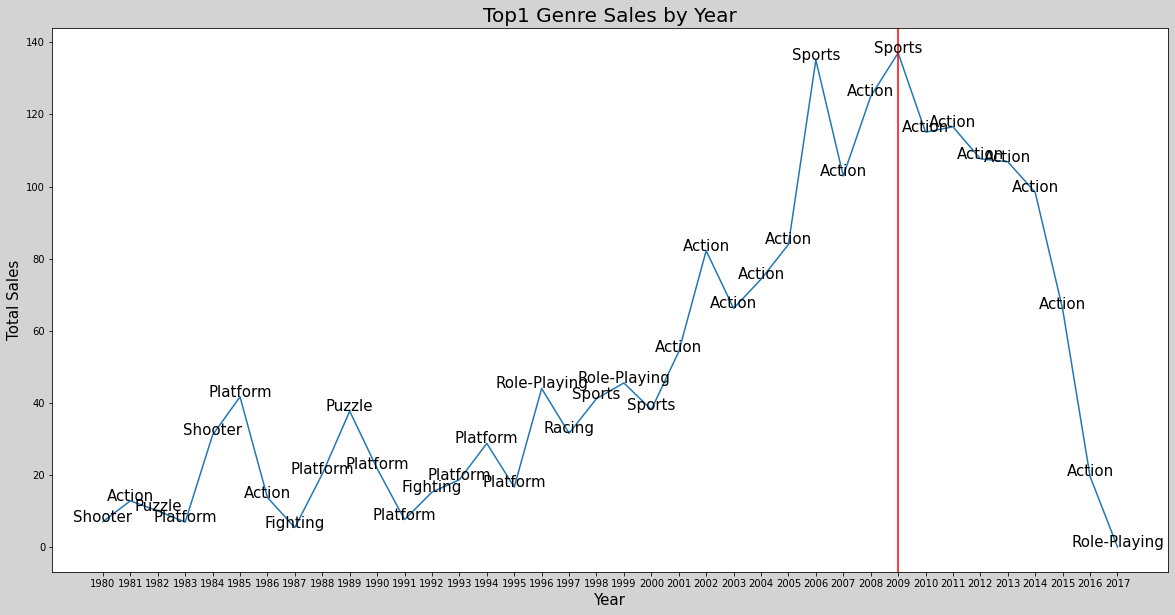

In [801]:
ShowYearGenre(True)

sports top =  [1998 2000 2006 2009]


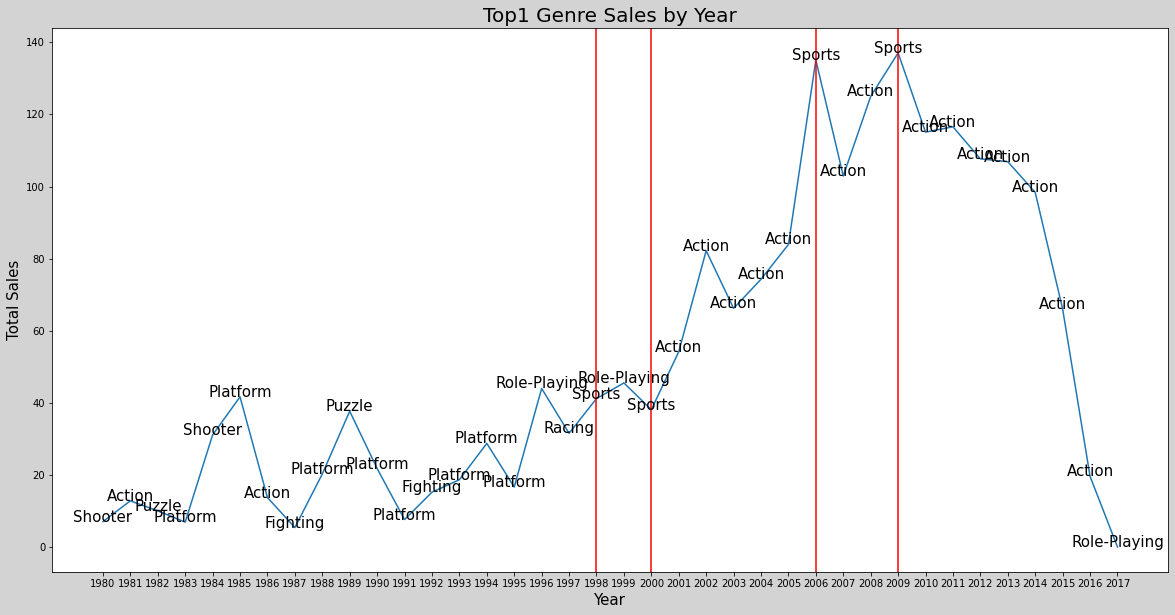

In [797]:
ShowYearGenre(False)

## 판매량이 많은 게임에 대한 분석

In [748]:
#출고량이 높은 게임에 대한 분석 및 시각화

#top games
df_tg = df1[ [ 'Name', 'Platform', 'Genre', 'Publisher','Total_Sales']]
df_tg = df_tg.groupby('Publisher').sum().sort_values(by='Total_Sales', ascending=False)
#df_tg = df_tg.reset_index(drop=True)
#df_tg.head(10)

df_tg10 = df_tg.head(10)
top10S = df_tg10['Total_Sales'].sum()
allS = df_tg['Total_Sales'].sum()

print(f'top10 sales = {top10S} total sales ={allS} \n= {(top10S/allS)*100}')

#df_tg.head(0)

#df_tg.info()


top10 sales = 5836.799999999999 total sales =8242.92 
= 70.80985864232578


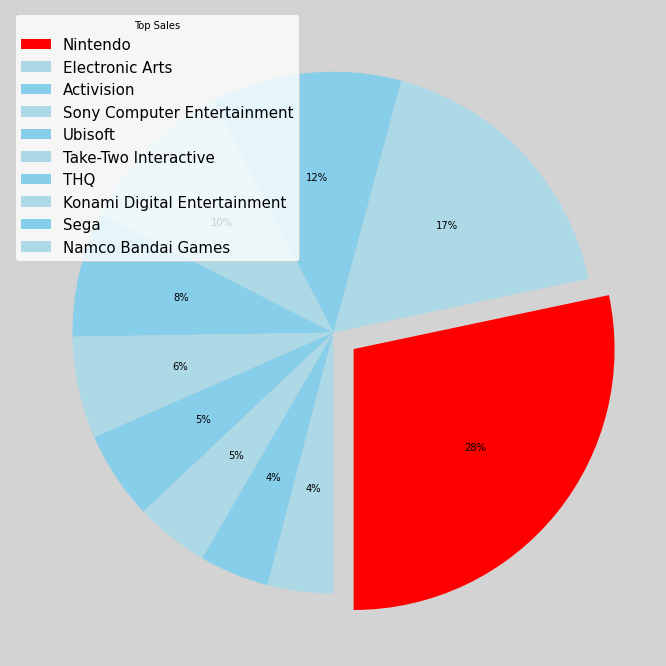

In [749]:

fig, ax = plt.subplots(figsize = (20,12))
ax.grid(False)
fig.set_facecolor('lightgrey')
 

mylabels = df_tg10.index
myExplode = [0 for _ in mylabels] 
myExplode[0] = 0.1

myColor = [ 'skyblue' if i%2==0 else 'lightblue' for i,x in enumerate(myExplode)] 
myColor[0] = 'red'


plt.pie( df_tg10['Total_Sales'] , autopct='%.0f%%',explode = myExplode, startangle = 270, colors=myColor )
plt.legend(title ="Top Sales",loc='upper left',labels = mylabels, fontsize=15) 

plt.show();



In [776]:
#top10 games in Nintendo
df_tg = df1[ [ 'Name', 'Platform', 'Genre', 'Publisher','Total_Sales']]
df_tg = df_tg.sort_values(by='Total_Sales', ascending=False)
df_tg = df_tg.reset_index(drop=True)
#df_tg.head(10)#['Total_Sales'].sum()

df_tg10_Nintendo = df_tg.head(10)
df_tg10_Nintendo


,Name,Platform,Genre,Publisher,Total_Sales
0,Wii Sports,Wii,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,Racing,Nintendo,35.83
3,Wii Sports Resort,Wii,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,31.38
5,Tetris,GB,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,DS,Platform,Nintendo,30.01
7,Wii Play,Wii,Misc,Nintendo,29.01
8,New Super Mario Bros. Wii,Wii,Platform,Nintendo,28.61
9,Duck Hunt,NES,Shooter,Nintendo,28.31


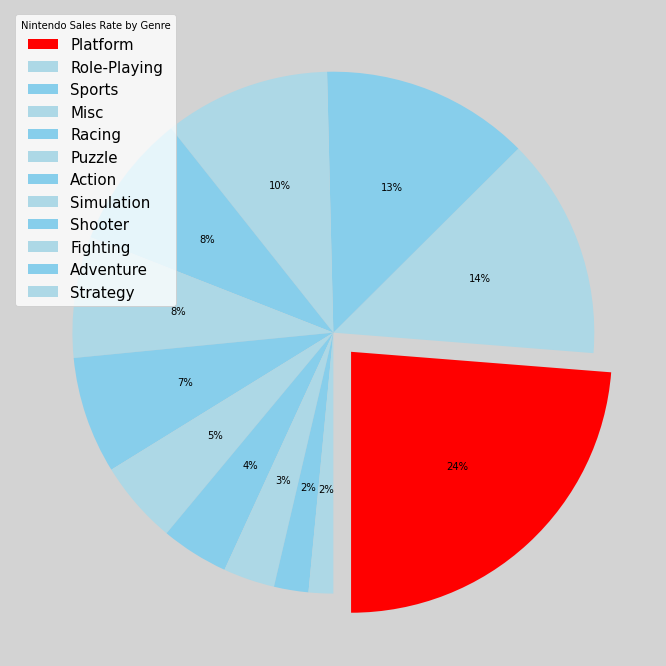

In [784]:

df_NinGenre = df_tg[ df_tg['Publisher'] == 'Nintendo'][ ['Genre','Total_Sales']]
df_NinGenre = df_NinGenre.groupby('Genre').sum().sort_values('Total_Sales',ascending=False).reset_index()

#print(df_NinGenre.head(5))

fig, ax = plt.subplots(figsize = (20,12))
ax.grid(False)
fig.set_facecolor('lightgrey')
 

mylabels = df_NinGenre['Genre']

myExplode = [0 for _ in mylabels] 
myExplode[0] = 0.1

myColor = [ 'skyblue' if i%2==0 else 'lightblue' for i,x in enumerate(myExplode)] 
myColor[0] = 'red'


plt.pie( df_NinGenre['Total_Sales'] , autopct='%.0f%%',explode = myExplode, startangle = 270, colors=myColor  )
plt.legend(title ="Nintendo Sales Rate by Genre",loc='upper left',labels = mylabels, fontsize=15) 


In [775]:
#닌텐도의 판매별 장르의 순위.

df_NinGenre['rank'] = df_NinGenre.index +1
df_NinGenre2 = df_NinGenre[ ['rank', 'Genre']]
df_NinGenre2.head(10)


,rank,Genre
0,1,Platform
1,2,Role-Playing
2,3,Sports
3,4,Misc
4,5,Racing
5,6,Puzzle
6,7,Action
7,8,Simulation
8,9,Shooter
9,10,Fighting


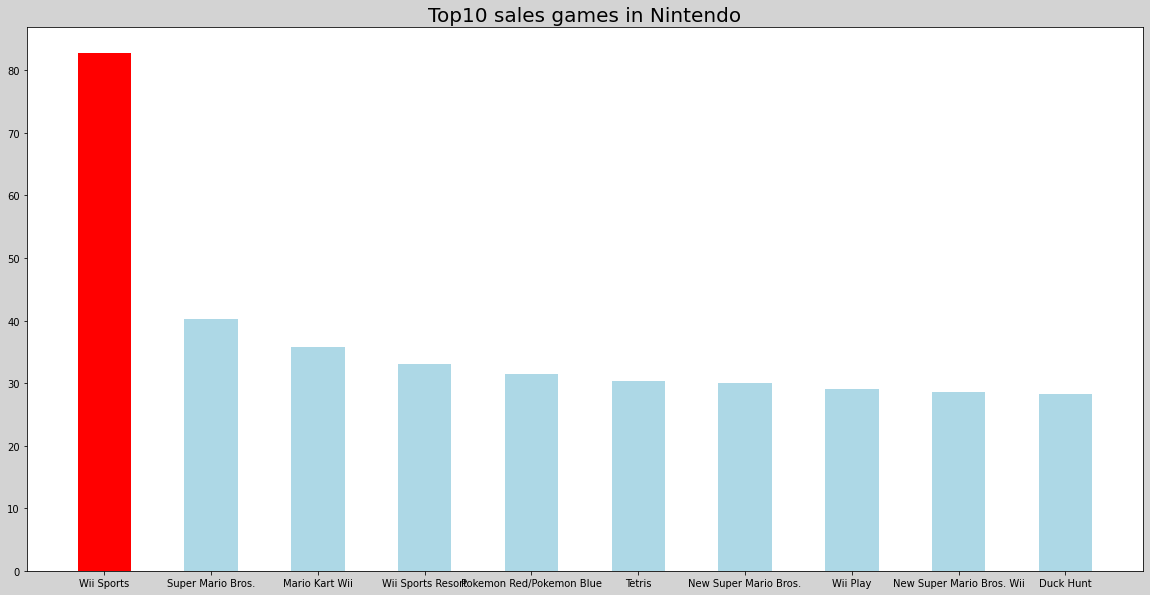

In [752]:

fig, ax = plt.subplots(figsize = (20,10))
fig.set_facecolor('lightgrey')


mylabels = df_tg10_Nintendo.index
colors = ['lightblue' for x in range(len(mylabels))]
colors[0] = 'r'


ax.bar( x = 'Name', height = 'Total_Sales', data = df_tg10_Nintendo, color=colors, width = .5)
ax.set_title('Top10 sales games in Nintendo', size='20')

plt.show();



In [753]:
#Wii Sport가 어느지역에서 많이 팔렸냐 
df_wiiSpo = df1[ df1['Name'] =='Wii Sports'][sales]
# df_tg = df_tg.sort_values(by='Total_Sales', ascending=False)
# df_tg = df_tg.reset_index(drop=True)
df_wiiSpo = df_wiiSpo.T
df_wiiSpo.columns=['Area_Sales']
df_wiiSpo.head(10)


,Area_Sales
NA_Sales,41.49
EU_Sales,29.02
JP_Sales,3.77
Other_Sales,8.46


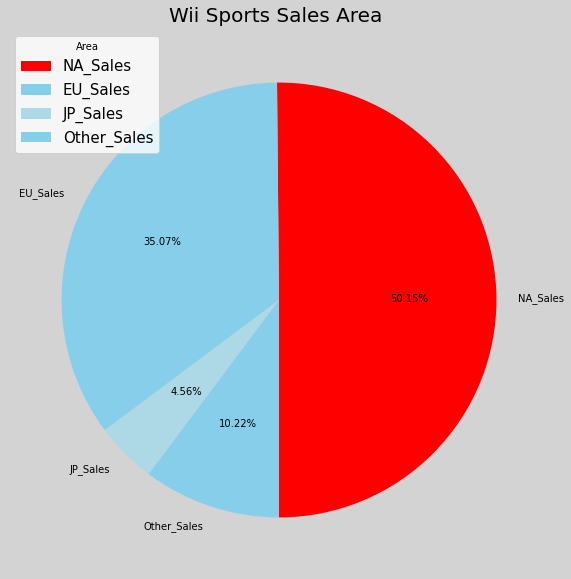

In [754]:

fig, ax = plt.subplots(figsize = (20,10))
ax.grid(False)
fig.set_facecolor('lightgrey')

mylabels = df_wiiSpo.index
# series 개수 만큼 넣어줘야함. index 순서. 가운데서 얼만큼 떨어트릴것인가?
myExplode = [0 for _ in mylabels] 
myExplode[0] = 0.1

myColor = [ 'lightblue' if i%2==0 else 'skyblue' for i in range(len(mylabels)) ] 
myColor[0] = 'red'

ax.pie( x='Area_Sales', data=df_wiiSpo, autopct='%.2f%%',labels = mylabels, startangle = 270, colors=myColor )
ax.set_title("Wii Sports Sales Area " ,fontsize=20)
plt.legend(title = "Area",loc='upper left', fontsize=15) 
plt.show()



## 정리
> #지역에 따라서 선호하는 게임 장르가 다를까? 
 - 지역별로 많이 팔린 장르에 대해 시각화


> #연도별 게임의 트렌드가 있을까 ?
 - 연도별 제일 많이 팔린 장르에 대한 시각화를 했다.


> #출고량이 높은 게임에 대한 분석 및 시각화 프로세스
 - 출고량이 높은 게임 순으로 시각화